 1. Tratamento e Organização dos Dados

In [2]:
import pandas as pd

# carregar os dados
data = pd.read_csv('DADOS/MICRODADOS_ENEM_2023.csv', sep=';', encoding='latin-1')

In [3]:
# visualizar as primeiras linhas do dataset
print(data.head())
print(data.info())
print(data.describe())
# colunas relevantes: região, gênero, tipo de escola e notas
# SG_UF_ESC, TP_SEXO, TP_DEPENDENCIA_ADM_ESC, NU_NOTA_'DISCIPLINA'

   NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210059085136    2023               14       M                2   
1  210059527735    2023               12       M                2   
2  210061103945    2023                6       F                1   
3  210060214087    2023                2       F                1   
4  210059980948    2023                3       F                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            1                 1                1               17          1   
1            1                 0                1               16          1   
2            1                 1                1                0          1   
3            3                 1                2                0          2   
4            3                 1                2                0          2   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...     C     C     B    B  

In [5]:
# se alguma dessas colunas tiver o valor ausente, a linha é removida do dataset
data = data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [6]:
# criando nova coluna para regiões
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Sul': ['PR', 'SC', 'RS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
}
data['REGIAO'] = data['SG_UF_ESC'].map(
    lambda uf: next((regiao for regiao, estados in regioes.items() if uf in estados), 'Não preenchido')
)

# criando nova coluna para genero
data['GENERO'] = data['TP_SEXO'].map({'F': 'Feminino', 'M': 'Masculino'})

# criando nova coluna para tipo de escola
data['TIPO_ESCOLA'] = data['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'})

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_10512\659531140.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['REGIAO'] = data['SG_UF_ESC'].map(
C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_10512\659531140.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENERO'] = data['TP_SEXO'].map({'F': 'Feminino', 'M': 'Masculino'})
C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_10512\659531140.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

 2. Análise Estatística Descritiva

In [7]:
# calculo de média das notas
regiao = data.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

genero = data.groupby('GENERO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

tipo_escola = data.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

display(regiao)
display(genero)
display(tipo_escola)


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
REGIAO,,,,,
Centro-Oeste,501.081565,528.033030,522.704735,544.604885,646.006484
Nordeste,479.928798,505.668010,502.355750,518.004973,622.938822
Norte,475.627750,502.909298,498.912463,501.264370,609.378934
Não preenchido,495.075542,525.927251,519.651804,529.134477,620.463238
Sudeste,515.049410,546.342053,539.793973,578.422838,668.699714
Sul,510.343406,542.020086,537.315366,567.327927,644.726231


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
GENERO,,,,,
Feminino,487.673966,522.563647,519.113989,517.011339,643.583549
Masculino,509.009871,531.991440,522.178397,561.075506,599.607297


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TIPO_ESCOLA,,,,,
Estadual,471.117063,500.903230,500.962766,502.294344,578.728461
Federal,531.156656,562.034335,551.471831,602.806984,727.519228
Municipal,482.813203,513.339078,510.351475,519.515141,590.144033
Privada,549.445419,575.578812,561.208844,632.445599,764.742293


In [8]:
# cálculo da mediana
regiao = data.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].median()

genero = data.groupby('GENERO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].median()

tipo_escola = data.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].median()

display(regiao)
display(genero)
display(tipo_escola)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
REGIAO,,,,,
Centro-Oeste,500.2,535.10,527.7,538.4,640.0
Nordeste,475.0,509.60,506.0,499.8,640.0
Norte,472.5,507.05,502.6,483.8,620.0
Não preenchido,492.9,532.20,523.8,517.5,620.0
Sudeste,516.2,554.00,545.2,583.6,680.0
Sul,514.1,549.60,542.6,571.5,640.0


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
GENERO,,,,,
Feminino,483.8,527.9,522.6,503.2,640.0
Masculino,512.4,541.3,528.8,561.4,600.0


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TIPO_ESCOLA,,,,,
Estadual,471.9,508.40,507.2,491.80,600.0
Federal,536.9,571.00,557.8,615.60,760.0
Municipal,482.6,522.35,518.1,514.65,600.0
Privada,553.5,584.10,567.6,648.30,800.0


In [9]:
# cálculo do desvio padrão
regiao = data.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

genero = data.groupby('GENERO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

tipo_escola = data.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

display(regiao)
display(genero)
display(tipo_escola)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
REGIAO,,,,,
Centro-Oeste,87.680822,84.649912,72.292177,132.140561,209.805677
Nordeste,84.577657,89.622830,78.229381,129.502987,243.403983
Norte,81.790913,86.986635,75.317969,119.545619,231.670361
Não preenchido,87.937266,86.874287,73.985789,130.711986,205.793066
Sudeste,86.038142,80.976169,67.655095,130.566231,194.236557
Sul,88.649418,78.753548,67.013635,131.039627,189.001924


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
GENERO,,,,,
Feminino,84.030366,84.430661,72.474907,125.226867,206.137128
Masculino,91.918979,90.152317,76.632868,136.676301,210.755535


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TIPO_ESCOLA,,,,,
Estadual,77.240232,80.927952,70.771826,115.037966,216.307095
Federal,78.400918,77.316447,65.473681,121.552426,170.745559
Municipal,79.850807,83.721277,72.725604,120.480535,202.198464
Privada,84.059042,76.098478,65.506584,124.405147,161.195182


In [10]:
# cálculo dos quartis
regiao = data.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].quantile([0.25, 0.5, 0.75])

genero = data.groupby('GENERO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].quantile([0.25, 0.5, 0.75])

tipo_escola = data.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].quantile([0.25, 0.5, 0.75])

display(regiao)
display(genero)
display(tipo_escola)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
REGIAO                                                                
Centro-Oeste   0.25       445.7      475.30       478.5      440.80   
               0.50       500.2      535.10       527.7      538.40   
               0.75       556.6      587.50       573.2      643.00   
Nordeste       0.25       423.6      443.00       451.2      413.60   
               0.50       475.0      509.60       506.0      499.80   
               0.75       534.9      570.10       557.4      612.70   
Norte          0.25       423.0      444.70       451.0      409.40   
               0.50       472.5      507.05       502.6      483.80   
               0.75       529.1      563.90       551.1      582.60   
Não preenchido 0.25       440.3      470.90       473.0      428.10   
               0.50       492.9      532.20       523.8      517.50   
               0.75       549.8      586.30       570.8      623.10   
Sudeste        0.25       459.6      499.60       499.6      480.00   
               0.50       516.2      554.00       545.2      583.60   
               0.75       569.7      602.00       586.4      675.20   
Sul            0.25       459.1      495.80       497.3      473.30   
               0.50       514.1      549.60       542.6      571.50   
               0.75       565.5      596.50       583.7      663.25   

                     NU_NOTA_REDACAO  
REGIAO                                
Centro-Oeste   0.25            540.0  
               0.50            640.0  
               0.75            820.0  
Nordeste       0.25            500.0  
               0.50            640.0  
               0.75            820.0  
Norte          0.25            480.0  
               0.50            620.0  
               0.75            800.0  
Não preenchido 0.25            520.0  
               0.50            620.0  
               0.75            780.0  
Sudeste        0.25            560.0  
               0.50            680.0  
               0.75            820.0  
Sul            0.25            540.0  
               0.50            640.0  
               0.75            780.0

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
GENERO                                                           
Feminino  0.25       435.1       468.7       472.9       420.7   
          0.50       483.8       527.9       522.6       503.2   
          0.75       539.6       581.1       569.2       604.9   
Masculino 0.25       452.4       476.0       475.1       454.9   
          0.50       512.4       541.3       528.8       561.4   
          0.75       566.7       595.4       575.7       662.8   

                NU_NOTA_REDACAO  
GENERO                           
Feminino  0.25            520.0  
          0.50            640.0  
          0.75            800.0  
Masculino 0.25            500.0  
          0.50            600.0  
          0.75            740.0

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
TIPO_ESCOLA                                                        
Estadual    0.25     424.600     448.100     457.300     414.700   
            0.50     471.900     508.400     507.200     491.800   
            0.75     522.400     558.900     550.900     584.500   
Federal     0.25     481.025     519.300     513.000     518.300   
            0.50     536.900     571.000     557.800     615.600   
            0.75     582.400     614.700     597.100     690.775   
Municipal   0.25     432.500     461.000     465.575     425.400   
            0.50     482.600     522.350     518.100     514.650   
            0.75     536.400     572.025     560.700     609.025   
Privada     0.25     495.800     533.700     523.200     550.700   
            0.50     553.500     584.100     567.600     648.300   
            0.75     603.800     627.100     606.300     720.000   

                  NU_NOTA_REDACAO  
TIPO_ESCOLA                        
Estadual    0.25            480.0  
            0.50            600.0  
            0.75            720.0  
Federal     0.25            620.0  
            0.50            760.0  
            0.75            860.0  
Municipal   0.25            500.0  
            0.50            600.0  
            0.75            720.0  
Privada     0.25            660.0  
            0.50            800.0  
            0.75            900.0

 3. Visualização dos Dados

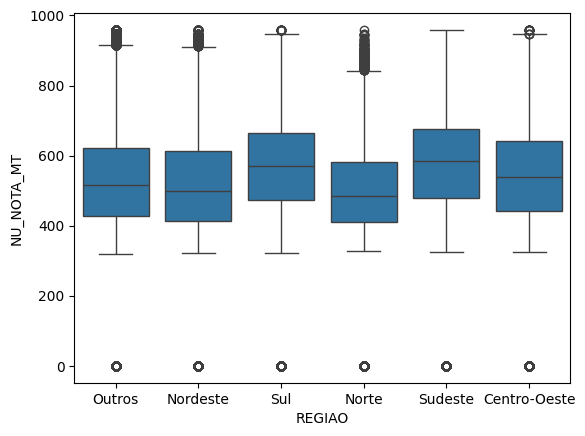

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribuição de notas em matemática e suas tecnologias por região (boxplot)
sns.boxplot(x='REGIAO', y='NU_NOTA_MT', data=data)
plt.show()

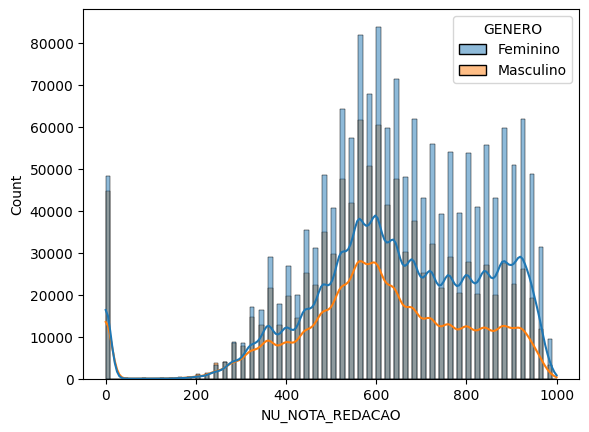

In [ ]:
# distribuição de notas em redação por gênero (histograma)
sns.histplot(data=data, x='NU_NOTA_REDACAO', hue='GENERO', kde=True, binwidth=10)
plt.show()

C:\Users\Leandro Souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


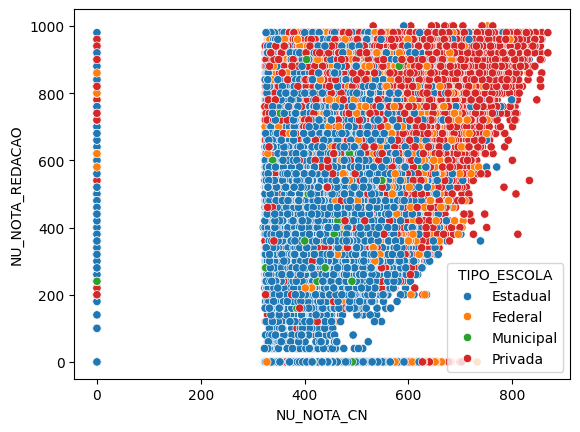

In [ ]:
# comparação de notas em redação e ciências naturais por tipo de escola (dispersão)
sns.scatterplot(data=data, x='NU_NOTA_CN', y='NU_NOTA_REDACAO', hue='TIPO_ESCOLA')
plt.show()

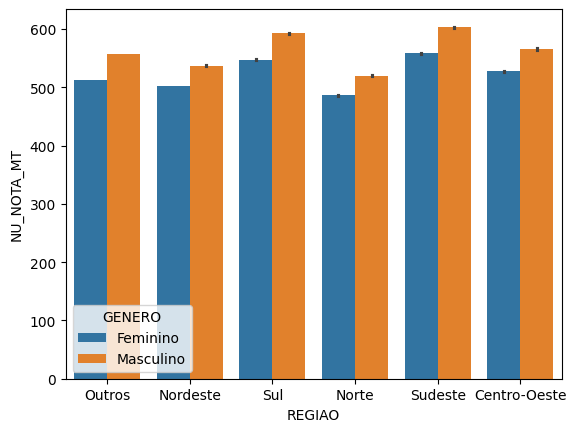

In [ ]:
# comparação de médias de notas em matemática e suas tecnologias por gênero e região (barplot)
sns.barplot(x='REGIAO', y='NU_NOTA_MT', hue='GENERO', data=data)
plt.show()

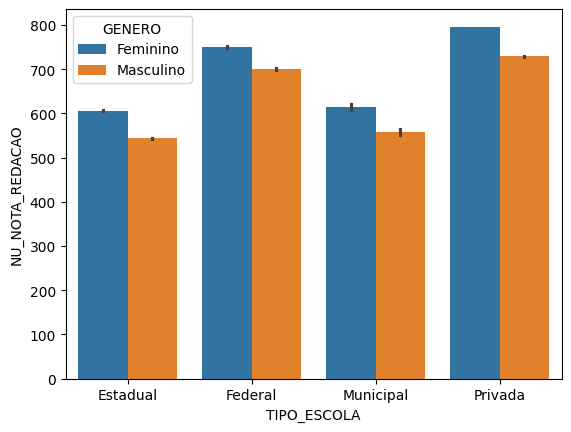

In [ ]:
# comparação de médias de notas em redação por gênero e tipo de escola (barplot)
sns.barplot(x='TIPO_ESCOLA', y='NU_NOTA_REDACAO', hue='GENERO', data=data)
plt.show()

 4. Análise de Correlação entre Notas

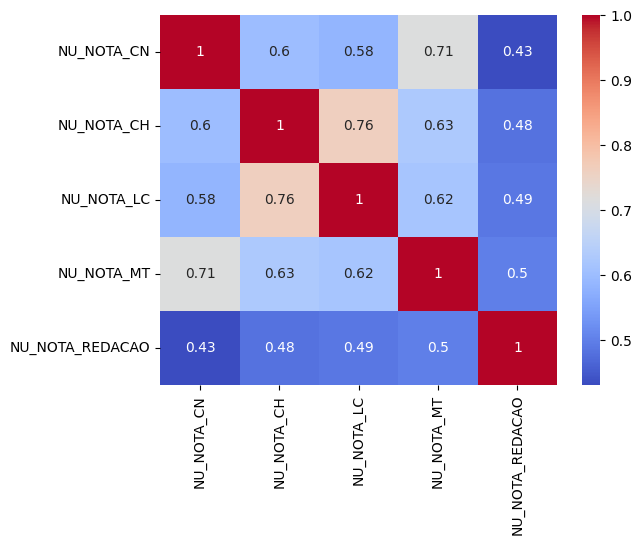

In [ ]:
# análise correlação entra as notas das disciplinas
corr = data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

# cria o heatmap da correlação
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

5. Descoberta de Informações e Insights

In [ ]:
# Desempenho por Região: Comparando as médias das notas por região e identificar possíveis disparidades
media_por_regiao = data.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

print(media_por_regiao)

                NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
REGIAO                                                           
Centro-Oeste    501.081565  528.033030  522.704735  544.604885   
Nordeste        479.928798  505.668010  502.355750  518.004973   
Norte           475.627750  502.909298  498.912463  501.264370   
Não preenchido  495.075542  525.927251  519.651804  529.134477   
Sudeste         515.049410  546.342053  539.793973  578.422838   
Sul             510.343406  542.020086  537.315366  567.327927   

                NU_NOTA_REDACAO  
REGIAO                           
Centro-Oeste         646.006484  
Nordeste             622.938822  
Norte                609.378934  
Não preenchido       620.463238  
Sudeste              668.699714  
Sul                  644.726231  


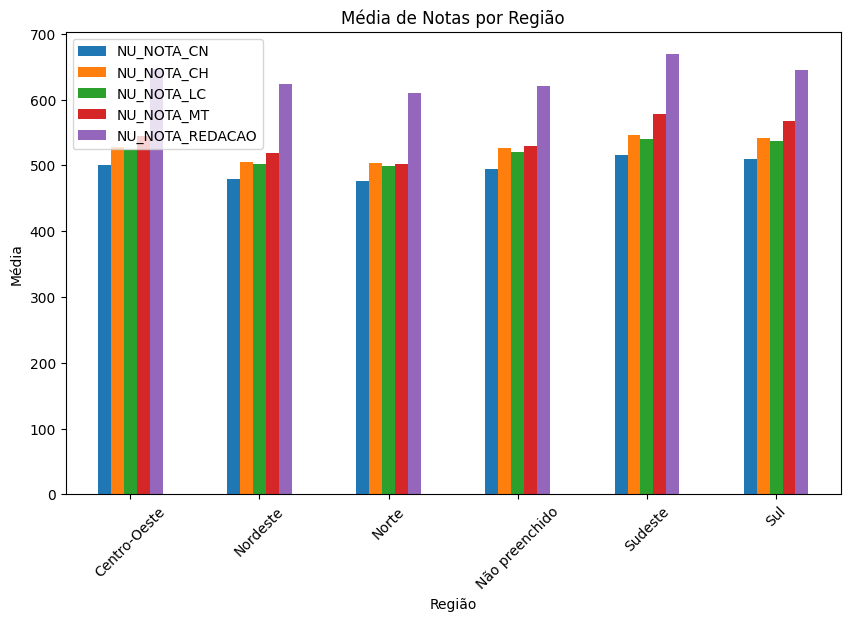

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

media_por_regiao.plot(kind='bar', figsize=(10, 6))
plt.title("Média de Notas por Região")
plt.ylabel("Média")
plt.xlabel("Região")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Disparidades por Gênero e Tipo de Escola: Analisando a diferença entre escolas públicas e privadas e gêneros
tipo_escola = data.groupby(['TIPO_ESCOLA', 'GENERO'])[['NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
print(tipo_escola)

                       NU_NOTA_MT  NU_NOTA_REDACAO
TIPO_ESCOLA GENERO                                
Estadual    Feminino   486.458098       606.209742
            Masculino  522.686143       543.341745
Federal     Feminino   579.384524       750.483324
            Masculino  631.423119       699.463094
Municipal   Feminino   500.812842       615.295192
            Masculino  543.653299       557.682639
Privada     Feminino   616.751081       795.097456
            Masculino  650.637492       729.556894


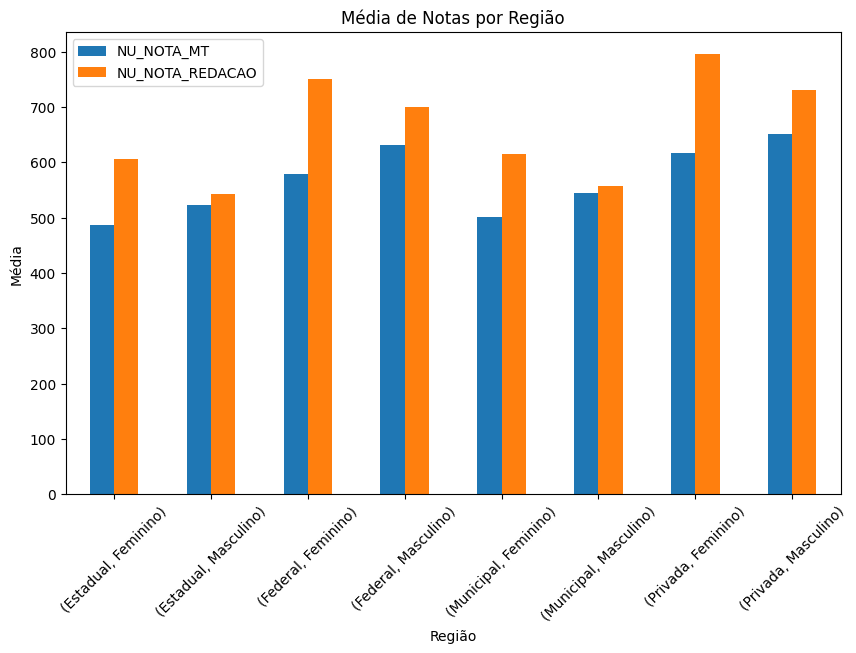

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

tipo_escola.plot(kind='bar', figsize=(10, 6))
plt.title("Média de Notas por Região")
plt.ylabel("Média")
plt.xlabel("Região")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Notas Extremas: Filtrando alunos com notas muito altas ou muito baixas em redação ou matemática e analisando se há padrões
notas_extremas = data[(data['NU_NOTA_MT'] < 100) | (data['NU_NOTA_MT'] > 900)]
print(notas_extremas.groupby('REGIAO')['NU_INSCRICAO'].count())

REGIAO
Centro-Oeste        521
Nordeste           1483
Norte               366
Não preenchido    16226
Sudeste            1953
Sul                 969
Name: NU_INSCRICAO, dtype: int64


In [ ]:
# Comparando os quintis de desempenho
data['QUINTIL'] = pd.qcut(data['NU_NOTA_MT'], 5, labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])
desempenho = data.groupby(['QUINTIL', 'REGIAO'])[['NU_NOTA_REDACAO', 'NU_NOTA_CH']].mean()
print(desempenho)

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_10512\1701543027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QUINTIL'] = pd.qcut(data['NU_NOTA_MT'], 5, labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])
C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_10512\1701543027.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desempenho = data.groupby(['QUINTIL', 'REGIAO'])[['NU_NOTA_REDACAO', 'NU_NOTA_CH']].mean()


                            NU_NOTA_REDACAO  NU_NOTA_CH
QUINTIL     REGIAO                                     
Muito Baixo Centro-Oeste         483.929619  454.617403
            Nordeste             454.948490  438.076152
            Norte                471.490616  444.171908
            Não preenchido       491.538003  459.474155
            Sudeste              500.450049  466.460899
            Sul                  496.573396  467.191037
Baixo       Centro-Oeste         560.157756  485.614182
            Nordeste             553.293475  470.031934
            Norte                558.388726  476.226436
            Não preenchido       557.565099  489.118215
            Sudeste              566.033799  493.376650
            Sul                  556.077081  493.711450
Médio       Centro-Oeste         629.318772  515.943486
            Nordeste             642.010387  505.290971
            Norte                634.402250  508.041272
            Não preenchido       613.725379  519

In [91]:
# carregando número de pessoas inscritados no cadastro unico em 2023
cadunico = pd.read_csv('DADOS/cadunico_2023.csv')

In [92]:
cadunico['anomes_s'] = cadunico['anomes_s'].astype(str)

cadunico_2023 = cadunico[cadunico['anomes_s'].str.startswith('2023')]

In [101]:
cadunico_agrupado = cadunico_2023.groupby('codigo_ibge')['cadun_qtd_pessoas_cadastradas_i'].sum().reset_index()